In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

df = pd.read_csv('winequality-red.csv')
df.columns = ['acidezFija', 'acidezVolatil', 'acidoCitrico', 'azucarResidual', 'cantidadCloruros', 'dioxidoAzufreLibre', 'dioxidoAzufreTotal', 'densidad', 'pH', 'sulfatos', 'porcentajeAlcohol', 'calidadVino']
cols = ['acidezFija', 'acidezVolatil', 'acidoCitrico', 'azucarResidual', 'cantidadCloruros', 'dioxidoAzufreLibre', 'dioxidoAzufreTotal', 'densidad', 'pH', 'sulfatos', 'porcentajeAlcohol', 'calidadVino']
#df.head(5)
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acidezFija          1599 non-null   float64
 1   acidezVolatil       1599 non-null   float64
 2   acidoCitrico        1599 non-null   float64
 3   azucarResidual      1599 non-null   float64
 4   cantidadCloruros    1599 non-null   float64
 5   dioxidoAzufreLibre  1599 non-null   float64
 6   dioxidoAzufreTotal  1599 non-null   float64
 7   densidad            1599 non-null   float64
 8   pH                  1599 non-null   float64
 9   sulfatos            1599 non-null   float64
 10  porcentajeAlcohol   1599 non-null   float64
 11  calidadVino         1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


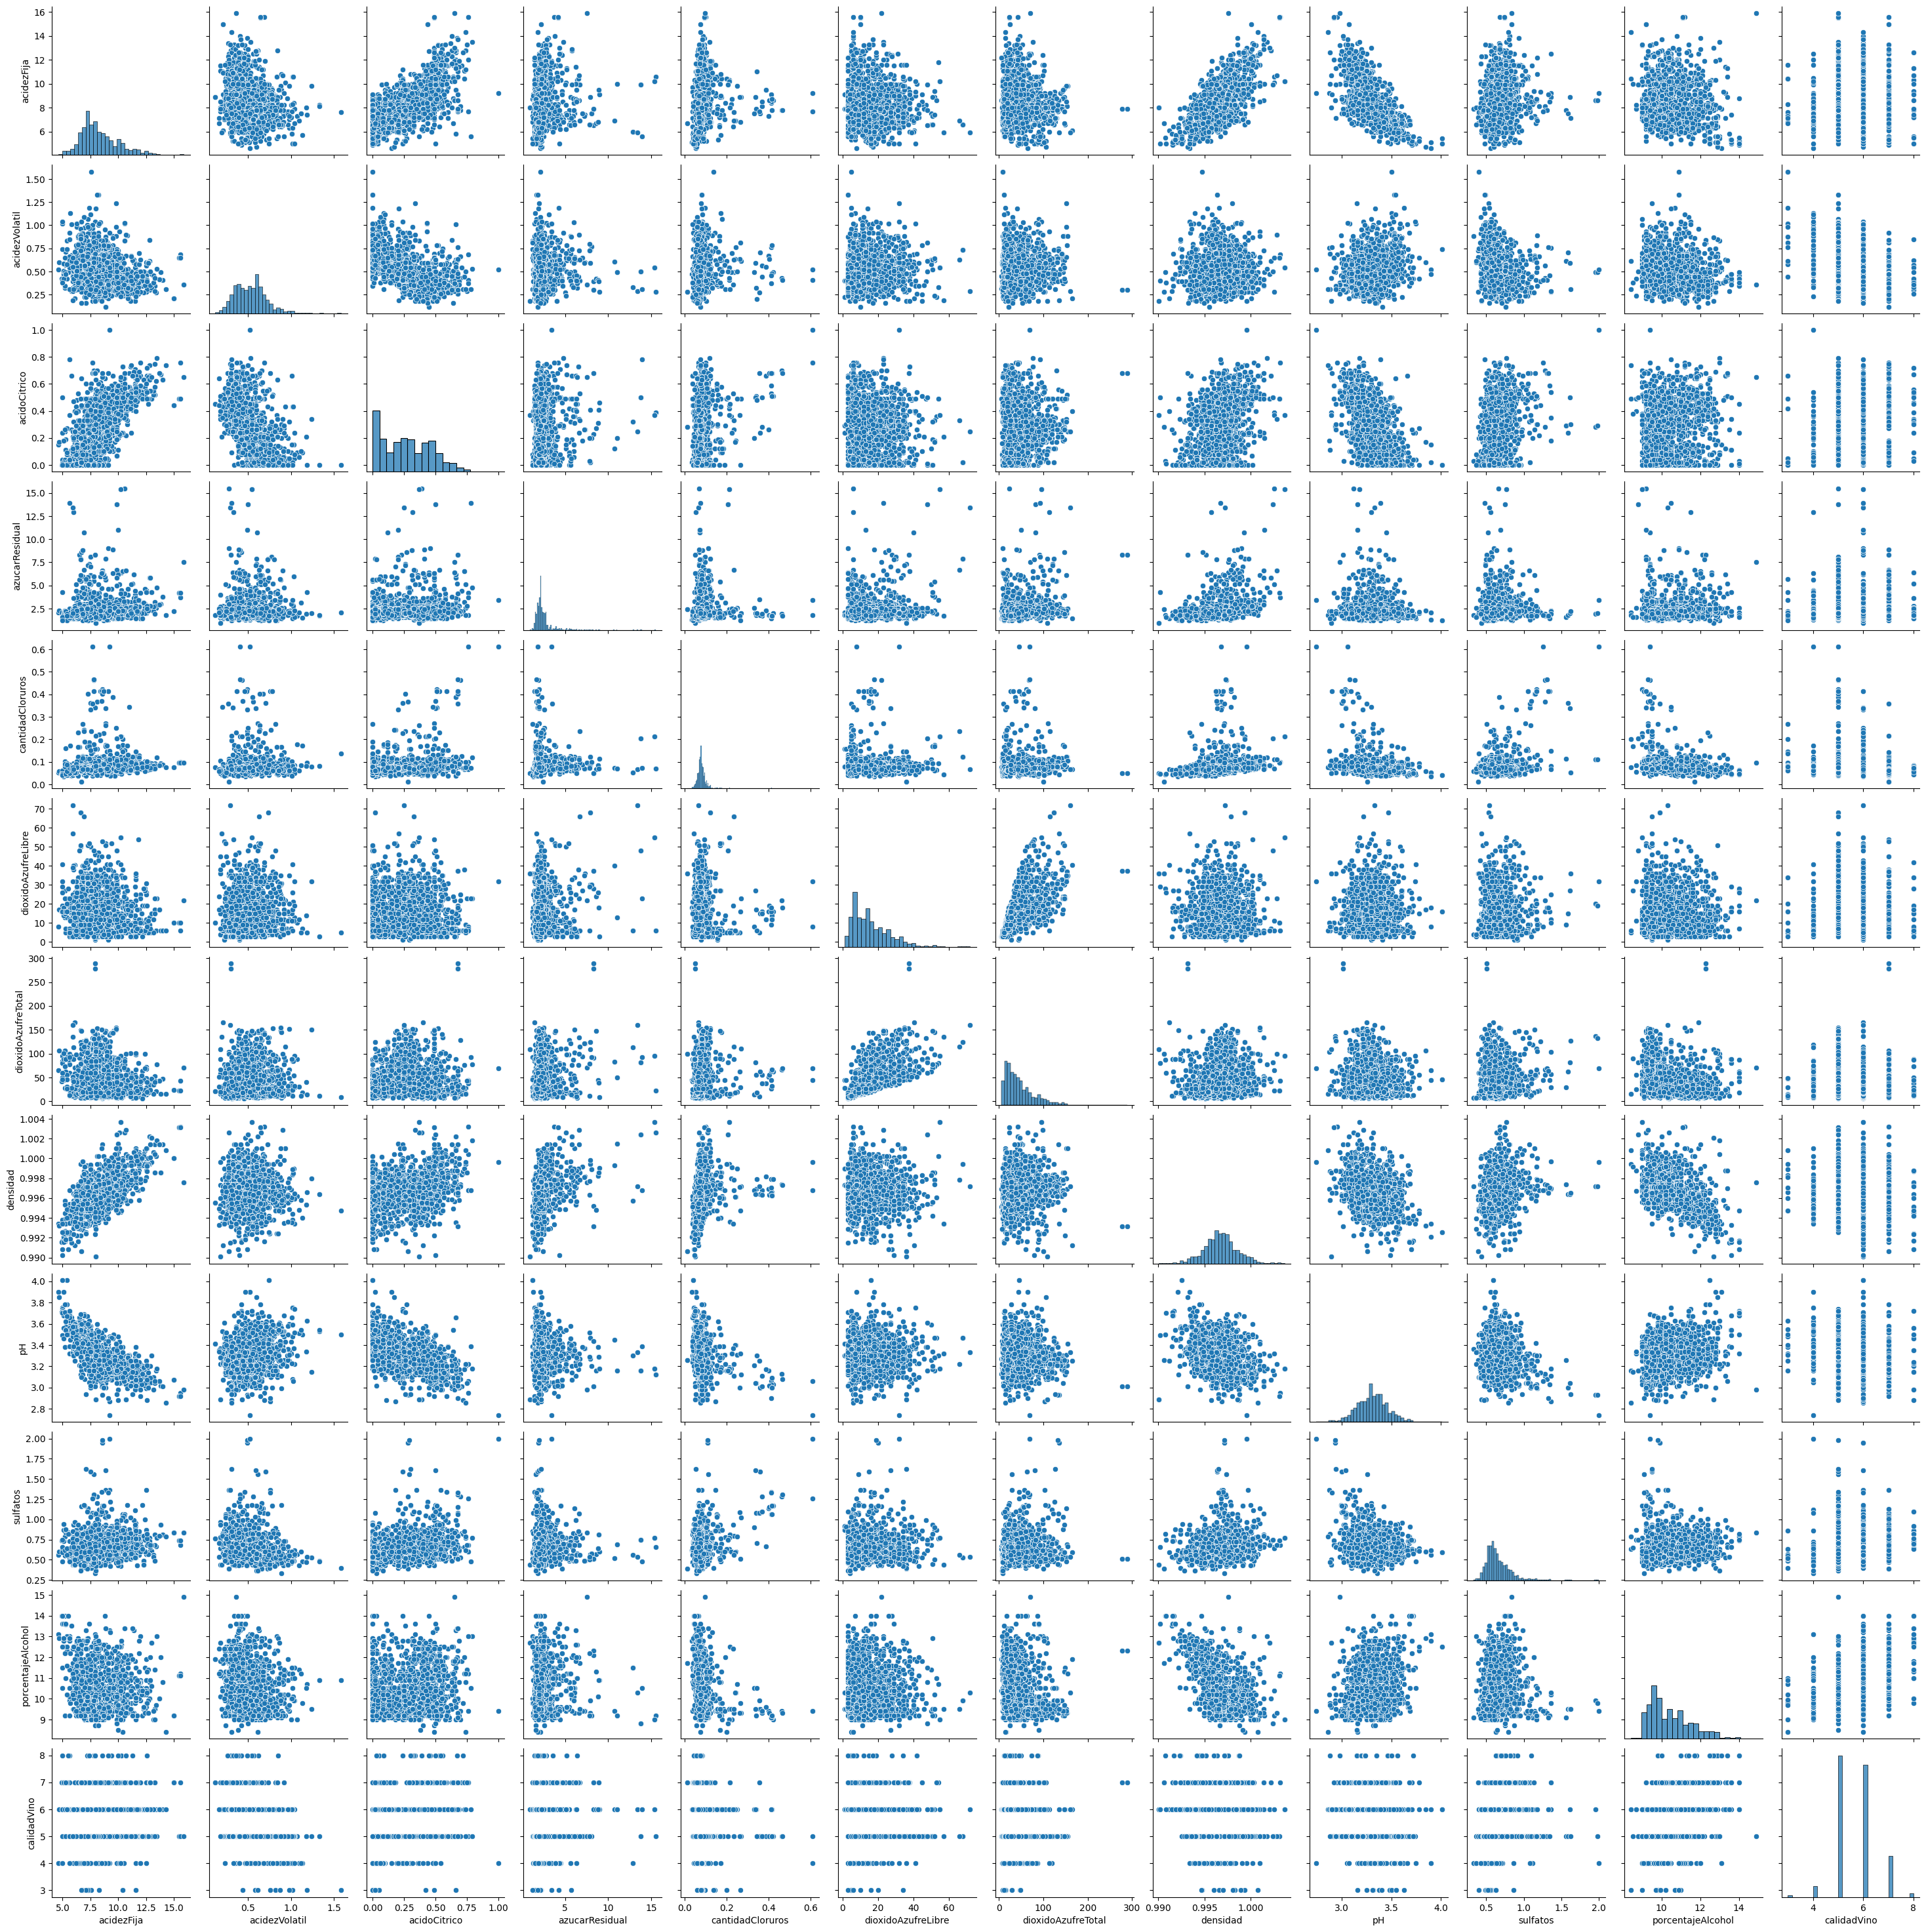

In [ ]:
sb.pairplot(df[cols])
plt.show()

<Axes: >

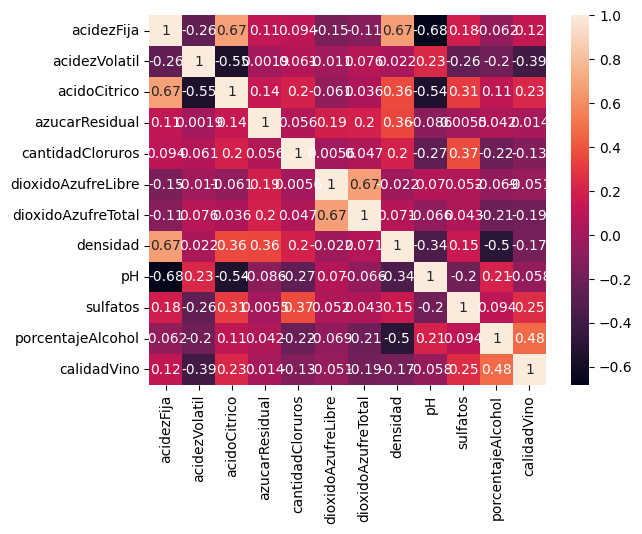

In [ ]:
sb.heatmap(df[cols].corr(), annot=True)

In [ ]:
X = df[['acidoCitrico', 'porcentajeAlcohol', 'sulfatos']]
y = df [['calidadVino']]

scaler = StandardScaler()

Xscaled = scaler.fit_transform(X)

kn = KNeighborsClassifier(n_neighbors = 3)

kn.fit(Xscaled, y)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

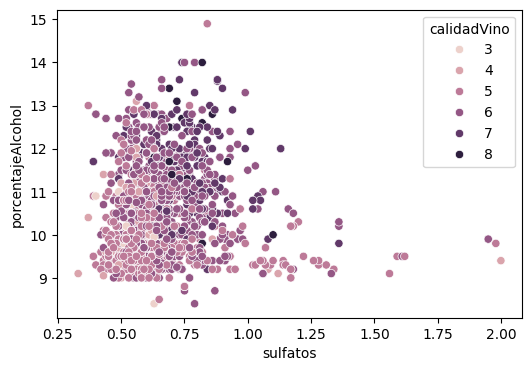

In [ ]:
plt.figure(figsize=(6,4))
sb.scatterplot(
    data=df,
    #x='acidoCitrico',
    x="sulfatos",
    y="porcentajeAlcohol",
    hue="calidadVino"
)
plt.xlabel("sulfatos")
plt.ylabel("porcentajeAlcohol")
plt.legend(title="calidadVino")
plt.show()

In [ ]:
#Acido citrico 0.1/2 - Alcohol 11/12 - Sulfato 0.1/0.75
print(" Ingrese los siguientes valores: ")
print("=================================")
acidoCitrico = float(input("Acido citrico | "))
porcentajeAlcohol = float(input("Porcentaje de alcohol | "))
sulfato = float(input("Sulfato | "))

inputF = [[acidoCitrico, porcentajeAlcohol, sulfato]]
inputScaler = scaler.transform(inputF)
kn.predict(inputScaler)
output = kn.predict(inputScaler)
print("=================================")
print("Calidad del vino: ", output[0])

 Ingrese los siguientes valores: 
Acido citrico | 2
Porcentaje de alcohol | 11
Sulfato | 0.75
Calidad del vino:  7


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
